In [1]:
%reload_ext autoreload
%autoreload 2

import pickle

import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc_file('../matplotlibrc')

## 1. Reach plots

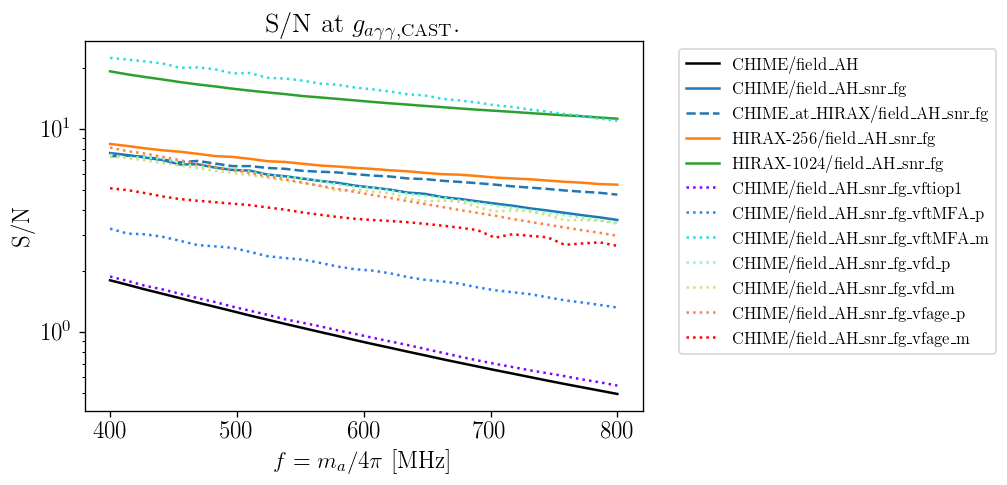

In [2]:
data_dir = '../data/estimates'

snr_vflags = ['tiop1', 'tMFA_p', 'tMFA_m', 'd_p', 'd_m', 'age_p', 'age_m']

plot_options = {
    #'CHIME/naive_gegenschein' : dict(c='k', ls=':'),
    'CHIME/field_AH' : dict(c='k', ls='-'),
    #'CHIME/field_AHgamma0p8' : dict(c='C0', ls='-.'),
    #'CHIME/field_BH' : dict(c='C1', ls=':'),
    #'CHIME/field_JF' : dict(c='C2', ls=':'),
    #'CHIME/field_AH_snr' : dict(c='C0', ls='--'),
    'CHIME/field_AH_snr_fg' : dict(c='C0', ls='-'),
    'CHIME_at_HIRAX/field_AH_snr_fg' : dict(c='C0', ls='--'),
    'HIRAX-256/field_AH_snr_fg' : dict(c='C1', ls='-'),
    'HIRAX-1024/field_AH_snr_fg' : dict(c='C2', ls='-'),
}

for i, vf in enumerate(snr_vflags):
    color = mpl.cm.get_cmap('rainbow')(i/(len(snr_vflags)-1))
    plot_options[f'CHIME/field_AH_snr_fg_vf{vf}'] = dict(c=color, ls=':')

plot_datas = {run_name : pickle.load(open(f'{data_dir}/{run_name}.p', 'rb')) \
              for run_name in plot_options.keys()}

#==============================

fig, ax = plt.subplots(figsize=(6, 4))

for i, (n, d) in enumerate(plot_datas.items()):
    ax.plot(d['freq'], d['SNR'], label=n, **plot_options[n])
    
#ax.set(ylim=(0.2,10))
ax.set(xlabel=r'$f=m_a/4\pi$ [MHz]', ylabel='S/N',
       title=r'S/N at $g_{a\gamma\gamma,\mathrm{CAST}}$.')
ax.set(yscale='log')
ax.legend(fontsize=10, bbox_to_anchor=(1.05, 1))
plt.savefig('plots/S_over_N.pdf')

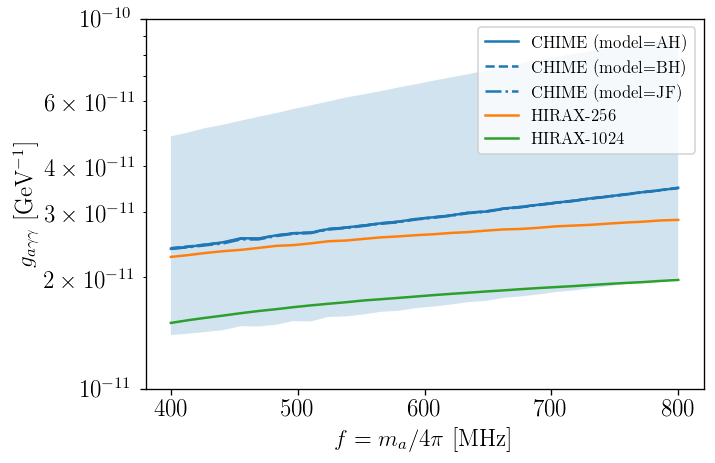

In [4]:
plot_options = {
    'CHIME/field_AH_snr_fg' : dict(c='C0', ls='-', label='CHIME (model=AH)'),
    'CHIME/field_BH_snr_fg' : dict(c='C0', ls='--', label='CHIME (model=BH)'),
    'CHIME/field_JF_snr_fg' : dict(c='C0', ls='-.', label='CHIME (model=JF)'),
    #'CHIME_at_HIRAX/field_AH_snr_fg' : dict(c='C0', ls='--'),
    'HIRAX-256/field_AH_snr_fg' : dict(c='C1', ls='-', label='HIRAX-256'),
    'HIRAX-1024/field_AH_snr_fg' : dict(c='C2', ls='-', label='HIRAX-1024'),
}

plot_datas = {run_name : pickle.load(open(f'{data_dir}/{run_name}.p', 'rb')) \
              for run_name in plot_options.keys()}

snr_vflags = ['tiop1', 'tMFA_p', 'tMFA_m', 'd_p', 'd_m', 'age_p', 'age_m']
plot_data_snr_uncert_freq = pickle.load(open(f'{data_dir}/CHIME/field_AH_snr_fg_vftiop1.p', 'rb'))['freq']
plot_data_snr_uncert_arr = np.array([
    pickle.load(open(f'{data_dir}/CHIME/field_AH_snr_fg_vf{vf}.p', 'rb'))['SNR']
    for vf in snr_vflags
])

reach_S_over_N = 1
gagg_CAST = 6.6e-11 # [GeV^-1]
def gagg_reach(S_over_N):
    return gagg_CAST*(S_over_N/reach_S_over_N)**(-0.5)

#==============================

fig, ax = plt.subplots(figsize=(6, 4))

for i, (n, d) in enumerate(plot_datas.items()):
    ax.plot(d['freq'], gagg_reach(d['SNR']), **plot_options[n])
ax.fill_between(plot_data_snr_uncert_freq,
                gagg_reach(np.min(plot_data_snr_uncert_arr, axis=0)),
                gagg_reach(np.max(plot_data_snr_uncert_arr, axis=0)),
                fc='C0', ec='none', alpha=0.2)
    
ax.set(ylim=(1e-11,1e-10))
ax.set(xlabel=r'$f=m_a/4\pi$ [MHz]', ylabel=r'$g_{a\gamma\gamma}$ [GeV$^{-1}$]',
       title='')
ax.set(yscale='log')
ax.legend(fontsize=10)
plt.savefig('plots/reach.pdf')

## 2. S/N comparison

In [6]:
data_dir = '../data/plots/SNR_comp'
SNR_map = pickle.load(open(f'{data_dir}/SNR_map.p', 'rb'))
SNR_map_g = pickle.load(open(f'{data_dir}/SNR_map_g.p', 'rb'))
SNR_map_fg = pickle.load(open(f'{data_dir}/SNR_map_fg.p', 'rb'))

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


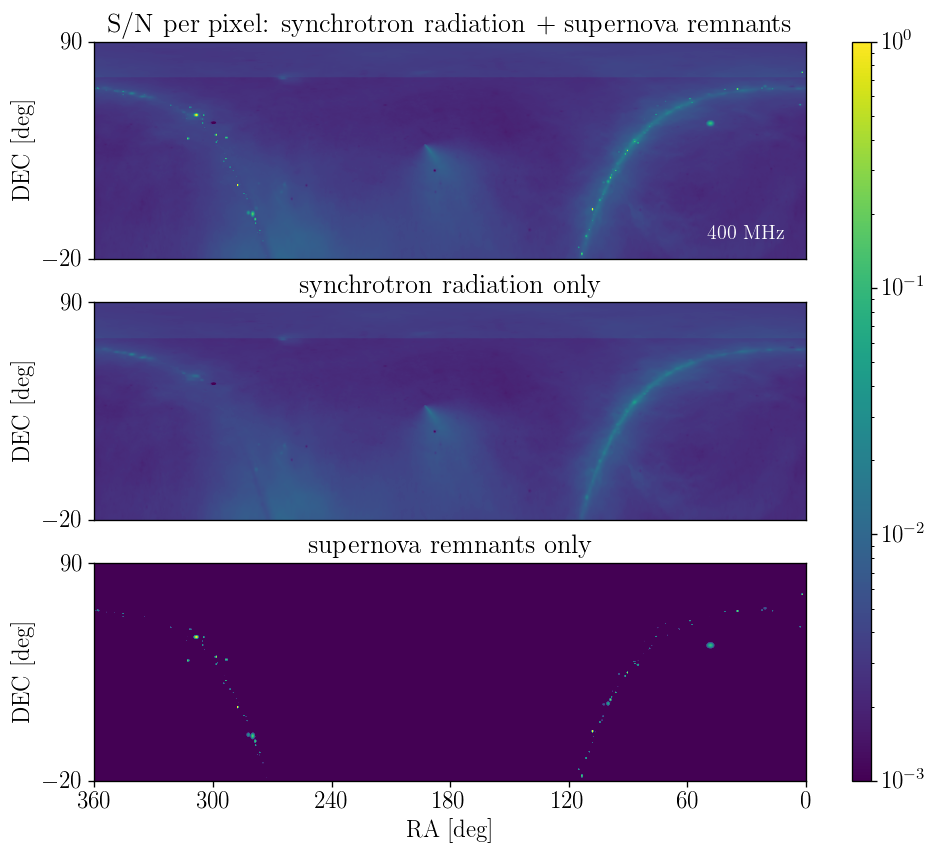

In [7]:
fig, axs = plt.subplots(3, 1, figsize=(10,8))

extent = (360, 0, -20, 90)
norm = mpl.colors.LogNorm(1e-3, 1e0)

im = axs[0].imshow(np.flip(SNR_map_fg), norm=norm, extent=extent, aspect=1)
axs[1].imshow(np.flip(SNR_map), norm=norm, extent=extent, aspect=1)
axs[2].imshow(np.flip(np.clip(SNR_map_fg-SNR_map, 1e-4, None)), norm=norm, extent=extent, aspect=1)

axs[0].set(xticks=[],
           yticks=np.linspace(extent[2], extent[3], 2))
axs[1].set(xticks=[],
           yticks=np.linspace(extent[2], extent[3], 2))
axs[2].set(xticks=np.linspace(extent[0], extent[1], 7),
           yticks=np.linspace(extent[2], extent[3], 2))

axs[0].set(ylabel='DEC [deg]')
axs[1].set(ylabel='DEC [deg]')
axs[2].set(ylabel='DEC [deg]', xlabel='RA [deg]')

axs[0].set(title='S/N per pixel: synchrotron radiation + supernova remnants')
axs[1].set(title='synchrotron radiation only')
axs[2].set(title='supernova remnants only')

[axs[i].text(50, -10, '400 MHz', color='w') for i in range(1)]

fig.colorbar(im, ax=axs, aspect=40)
plt.savefig('plots/1_CHIME_SNR_comp.pdf')